In [1]:
#python

In [1]:
import sympy as sym
from sympy.plotting import plot

In [2]:
x,a,b = sym.symbols("x,a,b")

In [3]:
pa = ((x-b)/(a-b)).subs(a,-1).subs(b,1)
pb = ((x-a)/(b-a)).subs(a,-1).subs(b,1)

dpa = sym.diff(pa)
dpb = sym.diff(pb)

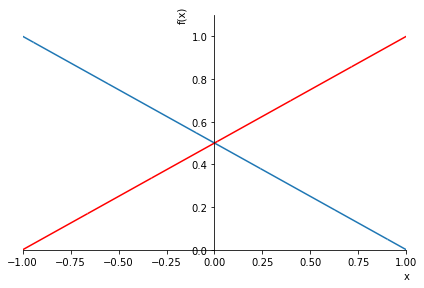

In [4]:
p1 = plot(pa,xlim=(-1,1),ylim=(0,1.1),show=False)
p1.append(plot(pb,line_color ='red',show=False)[0])
p1.show()

$$A^e_{AB} = \int \phi_A' \phi_B'\,dx$$

In [5]:
a1 = sym.integrate(dpa*dpa,(x,-1,1))
a2 = sym.integrate(dpa*dpb,(x,-1,1))
a3 = sym.integrate(dpb*dpa,(x,-1,1))
a4 = sym.integrate(dpb*dpb,(x,-1,1))
Ae = sym.Matrix([[a1,a2],[a3,a4]])
Ae

Matrix([
[ 1/2, -1/2],
[-1/2,  1/2]])

$$C^e_{AB} = \int \phi_A \phi_B\,dx$$

In [6]:
c1 = sym.integrate(pa*pa,(x,-1,1))
c2 = sym.integrate(pa*pb,(x,-1,1))
c3 = sym.integrate(pb*pa,(x,-1,1))
c4 = sym.integrate(pb*pb,(x,-1,1))
Ce = sym.Matrix([[c1,c2],[c3,c4]])
Ce

Matrix([
[2/3, 1/3],
[1/3, 2/3]])

$$K^e = \alpha A^e + \gamma C^e$$

In [9]:
import numpy as np

In [16]:
N = 7
X = np.linspace(0,1,N)

E = np.arange(N)

LM = np.array([])
for e in E:
    LM = np.append(LM,[e,e+1])

LM = LM.reshape(N,2)[:-1]

In [18]:
LM

array([[0., 1.],
       [1., 2.],
       [2., 3.],
       [3., 4.],
       [4., 5.],
       [5., 6.]])

In [27]:
alfa = 1
gamma = 1

Ae = np.array([[1,-1],[-1,1]])/2
Ce = np.array([[2,1],[1,2]])/3

K = np.zeros((N,N))
for e,globalP in enumerate(LM):
    localP = globalP-e

    g_i = globalP[0]
    g_j = globalP[1]

    l_i = localP[0]
    l_j = localP[1]

    K[g_i,g_i] += alfa*Ae[l_i,l_i] + gamma*Ce[l_i,l_i]
    K[g_i,g_j] += alfa*Ae[l_i,l_j] + gamma*Ce[l_i,l_j]
    K[g_j,g_i] += alfa*Ae[l_j,l_i] + gamma*Ce[l_j,l_i]
    K[g_j,g_j] += alfa*Ae[l_j,l_j] + gamma*Ce[l_j,l_j]




In [28]:
K[0,0]

0.0